## Tangential Velocity

*In Lecture \#6 we derived the formula for the tangential velocity of a point on the Earth to be $R\omega\ sin\ \phi$ where $\phi$ is the latitude (and $R = R_e = 6378.14\ km$ and $\omega = \omega_e = 15^{\circ}/hr$).*

- *a) Graph the tangential velocity as a function of latitude*
- *b) Explain why the velocity at the pole is what it is*
- *c) For a geosynchronous orbit inclined at 20 degrees, compare the orbital velocity (as a vector) to the tangential velocity as a vector at a latitude of 20 degrees. Which is moving faster Eastwards, the spacecraft or the ground*

---

Alright let's get started! First things first, we need a couple of imports, a couple of constants, and a couple of convenience functions.

In [37]:
%matplotlib inline
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# configure matplotlib to look nice
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2

# constants
R_E   = 6378.14     # radius of the earth (km)
ROT_E = 15.0/3600.0 # angular velocity of equator of the earth (degree/second)
GEO   = 42164.0     # geostationary orbit altitude (km)

# convenience functions
rad_to_deg = lambda r: float(r) * 180.0/np.pi # radians to degrees
deg_to_rad = lambda d: float(d) * np.pi/180.0 # degrees to radians

def plot(xlabel, ylabel, *plt_args, **kwargs):
    width = kwargs['width'] if 'width' in kwargs else 12
    height = kwargs['height'] if 'height' in kwargs else 8
    plt.figure(figsize=(width, height))
    plt.plot(*plt_args)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

### a) *Graph the tangential velocity..*
Let's just build up an array of velocity values based on latitude. We subtract $\phi$ from 90 to get the actual latitude.

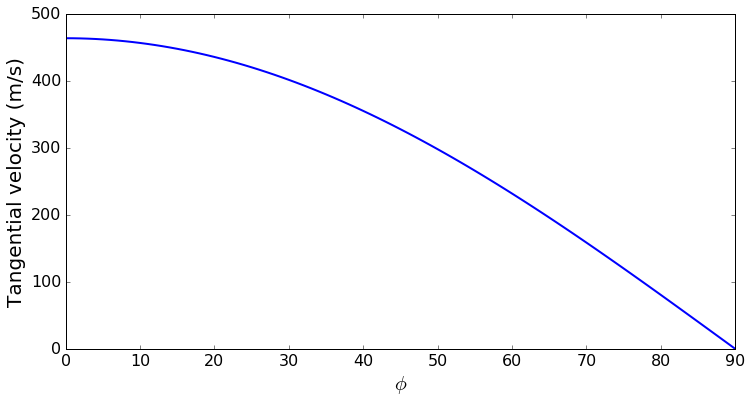

Velocity at equator: 463.831429805 m/s
Velocity at pole:    2.84014837927e-14 m/s


In [55]:
# TODO: Figure out how to do this using ROT_E
# goes to range 91 so we actually get 90 for the last element
tangential_velocity_at_latitude = lambda latitude: 2*np.pi*(R_E*1000 * np.cos(deg_to_rad(latitude)))/(3600*24)
velocity_by_latitude = [tangential_velocity_at_latitude(phi) for phi in range(0, 91)]
plot(r'$\phi$', r'Tangential velocity (m/s)', velocity_by_latitude, height=6)

print "Velocity at equator:", velocity_by_latitude[0], "m/s"
print "Velocity at pole:   ", velocity_by_latitude[-1], "m/s"

The floating point math gets a little fuzzy but the velocity at the pole is essentially zero.

### b) *Explain the velocity at the pole..*
The velocity is zero at the pole because it is a single point rotating in space. There is no displacement so there can't be any velocity. We are measuring the angular velocity of a vector rotating around the pole, so if the vector *is* the pole, the velocity will be zero.

### c) *For a geosynchronous orbit..*
At the moment when a spacecraft in a geosynchronous orbit inclined at 20 degrees is at 20 degrees in latitude it has zero velocity in the north/south direction. So its entire velocity is the eastward component. Since its orbit is circular, its speed is constant. This is great because we don't even need to bring any orbital equations into the mix. We can simply calculate the velocity necessary to trace out its circular orbit in 24 hours and we'll have the spacecraft's (constant) velocity.

In [39]:
#       orbit in meters       sec/day
print (GEO*1000 * 2*np.pi) / (24*3600), "m/s"

3066.25260755 m/s


Next calculate the velocity of a point at 20 degrees latitude as a vector. We already know that the only non-zero component of the vector is the tangential velocity so we can just calculate that part.

In [40]:
print "Tangential velocity at 20 degrees latitude:", tangential_velocity_at_latitude(20), "m/s"
print "As a vector: [0, {}, 0]".format(tangential_velocity_at_latitude(20))

Tangential velocity at 20 degrees latitude: 1438437.86216 m/s
As a vector: [0, 1438437.86216, 0]
